# Exemple de dades obertes

## Creació d'un mapa amb les parades del bicing de Barcelona

Importem les llibreries que necessitarem

In [33]:
import csv
import pandas as pd
import json

In [34]:
# Importem la llibreria per renderitzar maps desde OpenStreetMaps
# Podeu consultar més informació: https://github.com/komoot/staticmap/blob/master/README.md
from staticmap import StaticMap, CircleMarker


In [35]:
# Importem la llibreria per descarregarnos el dataset
import urllib.request
import pprint


Definim la localització d'on podem trobar el csv amb les localitzacions de les parades de bicing

In [36]:
url = 'https://opendata-ajuntament.barcelona.cat/data/dataset/bd2462df-6e1e-4e37-8205-a4b8e7313b84/resource/e5adca8d-98bf-42c3-9b9c-364ef0a80494/download'

In [37]:
# Descarreguem el fitxer json i el mostrem amb un prettify
urllib.request.urlretrieve(url, "./download.json")

with open ("./download.json",encoding="utf8") as fitxer:
    datos=json.load(fitxer)
    
pprint.pprint(datos)



{'data': {'stations': [{'_ride_code_support': True,
                        'address': 'GRAN VIA CORTS CATALANES, 760',
                        'altitude': 16.0,
                        'capacity': 46,
                        'is_charging_station': True,
                        'lat': 41.3979779,
                        'lon': 2.1801069,
                        'name': 'GRAN VIA CORTS CATALANES, 760',
                        'nearby_distance': 1000.0,
                        'physical_configuration': 'ELECTRICBIKESTATION',
                        'post_code': '08013',
                        'rental_uris': None,
                        'station_id': 1},
                       {'_ride_code_support': True,
                        'address': 'C/ ROGER DE FLOR, 126',
                        'altitude': 17.0,
                        'capacity': 29,
                        'is_charging_station': True,
                        'lat': 41.3954877,
                        'lon': 2.1771985,
      

In [38]:
# Passem el json a csv. Agafem les estacions
data_file = open("./download.csv","w",encoding="utf8")
csv_writer=csv.writer(data_file)
count=0

bicing_data = datos["data"]["stations"]
for station in bicing_data:
    if count == 0: #headers
        header=station.keys()
        csv_writer.writerow(header)
        count+=1
    csv_writer.writerow(station.values())
data_file.close()


In [39]:
# Llegim el csv i les columnes que volem
df = pd.read_csv("./download.csv", usecols=['name', 'lon', 'lat', 'address'])


In [40]:
# Fem un pretty del csv
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 200)
print(df)

                                    name        lat       lon                              address
0          GRAN VIA CORTS CATALANES, 760  41.397978  2.180107        GRAN VIA CORTS CATALANES, 760
1                  C/ ROGER DE FLOR, 126  41.395488  2.177198                C/ ROGER DE FLOR, 126
2                          C/ NÀPOLS, 82  41.394156  2.181331                        C/ NÀPOLS, 82
3                           C/ RIBES, 13  41.393317  2.181248                         C/ RIBES, 13
4    PG. LLUIS COMPANYS, 11 (ARC TRIOMF)  41.391103  2.180176  PG. LLUIS COMPANYS, 11 (ARC TRIOMF)
..                                   ...        ...       ...                                  ...
500                    C/ SANT ADRIÀ, 43  41.435207  2.194800                    C/ SANT ADRIÀ, 43
501                    C/ SANT ADRIÀ, 88  41.435460  2.200157                    C/ SANT ADRIÀ, 88
502             AV. RASOS DE PEGUERA, 10  41.462095  2.178959             AV. RASOS DE PEGUERA, 10
503       

In [41]:
# Ordenem alfabèticament pel nom del lloc
df.sort_values(by=['name'], inplace=True)
print(df)


                      name        lat       lon                address
474     AV. CAN MARCET, 36  41.434786  2.147904     AV. CAN MARCET, 36
34   AV. DE LA CATEDRAL, 6  41.385062  2.176683  AV. DE LA CATEDRAL, 6
95      AV. DIAGONAL,  602  41.392878  2.143411      AV. DIAGONAL, 602
96      AV. DIAGONAL,  612  41.392567  2.142217     AV. DIAGONAL,  612
153       AV. DIAGONAL, 26  41.411082  2.216314       AV. DIAGONAL, 26
..                     ...        ...       ...                    ...
260        VIA BARCINO, 69  41.450608  2.192363        VIA BARCINO, 69
458      VIA FAVÈNCIA, 186  41.442737  2.170393      VIA FAVÈNCIA, 186
460       VIA FAVÈNCIA, 47  41.441860  2.166422       VIA FAVÈNCIA, 47
365    WORLD  TRADE CENTER  41.371873  2.180302    WORLD  TRADE CENTER
364     WORLD TRADE CENTER  41.372029  2.180447     WORLD TRADE CENTER

[505 rows x 4 columns]


In [42]:
# Crear un mapa amb totes les parades de bicing a Barcelona.
# Cada parada li posarem un cercle vermell
m_bcn = StaticMap(1200, 1200)
for index, row in df.iterrows():
    marker = CircleMarker((row['lon'], row['lat']), 'red', 6)
    m_bcn.add_marker(marker)


In [43]:
# Per ultim fem un Render de la imatge
image = m_bcn.render()
image.save('./bicing.png')


i l'ultim punt es veure la imatge amb els punts

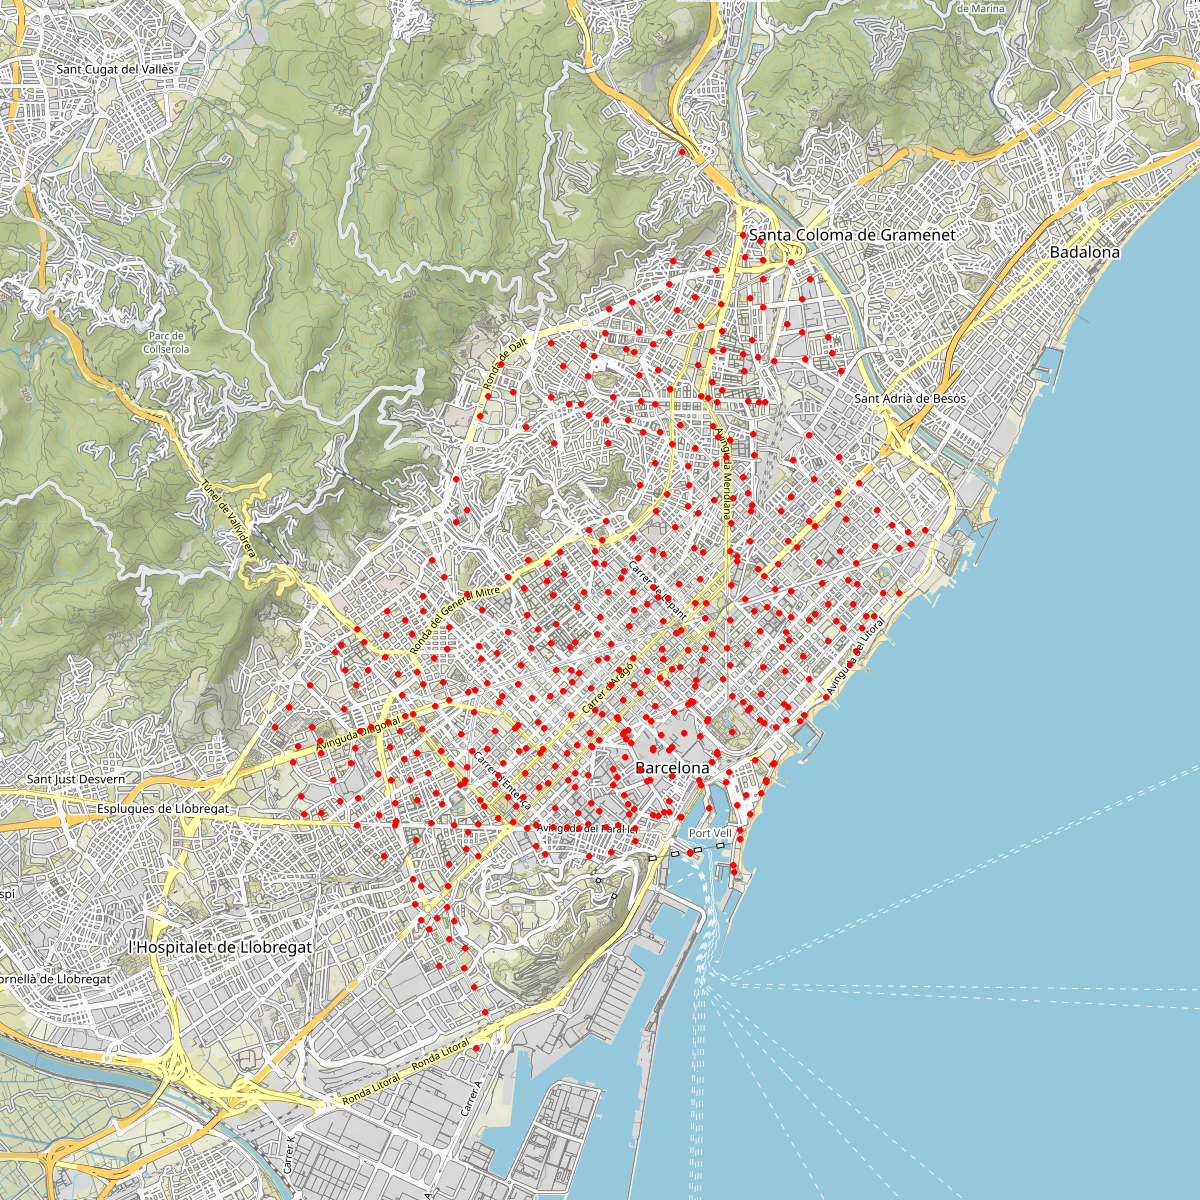

In [44]:
from IPython import display
display.Image("./bicing.png")